# Retail top-k data record generation analyses

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

Since this is exploratory, I used Pandas to play with the data. If the data file had been larger I would have pursued a Spark-friendly solution. I start by reading in the sorted (by date) version of the dataset.

In [128]:
df = pd.read_csv('sortedFull.csv')

Next I can get frequencies for categories and sub-categories.

In [129]:
df['Category'].value_counts(normalize=True)

Office Supplies    0.609729
Technology         0.197719
Furniture          0.192552
Name: Category, dtype: float64

In [130]:
office=df[df['Category'].values=='Office Supplies']
tech=df[df['Category'].values=='Technology']
furniture=df[df['Category'].values=='Furniture']

In [131]:
office['Sub-Category'].value_counts(normalize=True)

Binders       0.196719
Storage       0.161769
Art           0.156141
Paper         0.113133
Labels        0.083331
Envelopes     0.077863
Supplies      0.077543
Fasteners     0.077383
Appliances    0.056119
Name: Sub-Category, dtype: float64

In [132]:
tech['Sub-Category'].value_counts(normalize=True)

Phones         0.331032
Accessories    0.303225
Copiers        0.219209
Machines       0.146534
Name: Sub-Category, dtype: float64

In [133]:
furniture['Sub-Category'].value_counts(normalize=True)

Chairs         0.347712
Furnishings    0.320980
Bookcases      0.244127
Tables         0.087181
Name: Sub-Category, dtype: float64

Visualizations are nice, here's a histogram of the count of records within the Furniture category broken down by sub-category, using the oft applauded Seaborn.

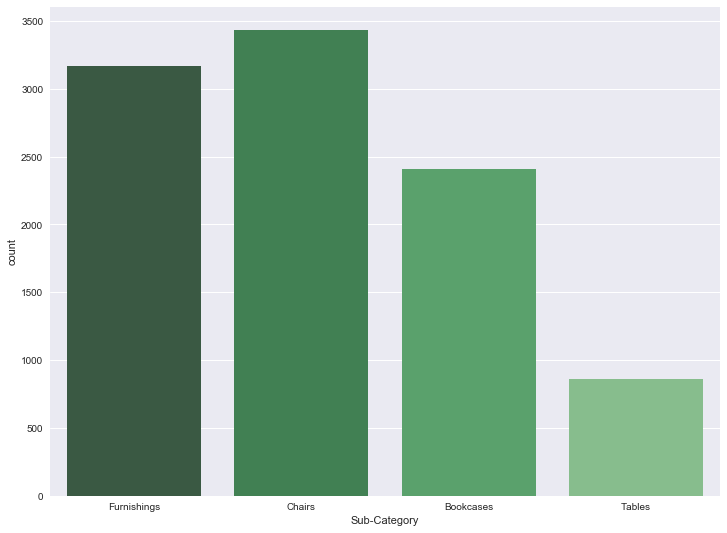

In [134]:
plt.rcParams["figure.figsize"] = [12,9]
sns.countplot(x="Sub-Category", data=furniture, palette='Greens_d')

Here's a histogram of all the categories broken down by sub-category. I don't like this one as much as I find it a bit crowded. At the same time it does give a full picture and it's Seaborn so it looks pretty to boot.

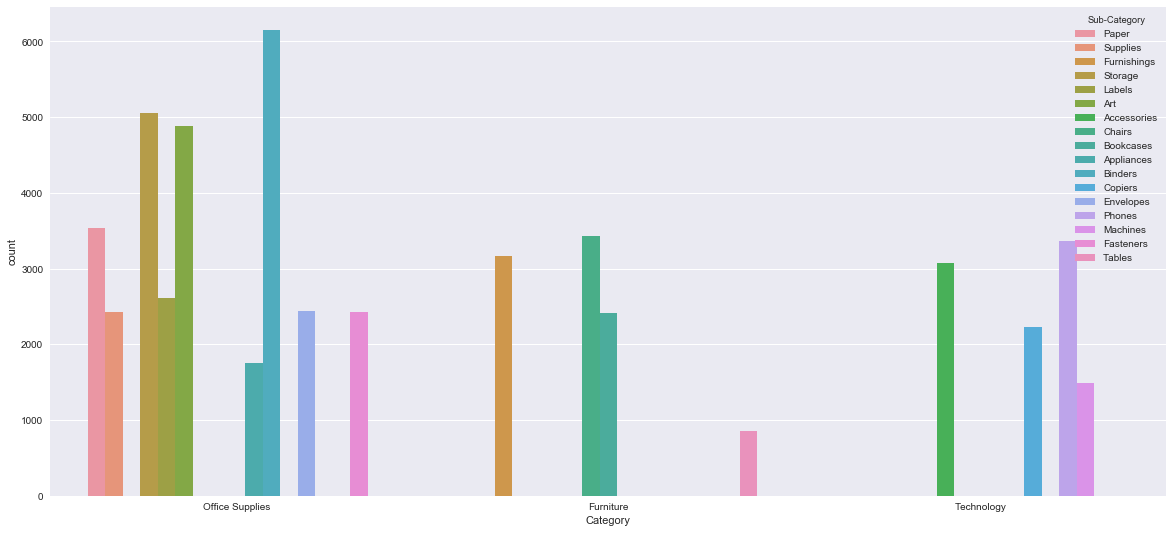

In [135]:
plt.rcParams["figure.figsize"] = [20,9]
sns.countplot(x="Category", hue="Sub-Category", data=df)

Next up, temporal information. Specifically we will eventually want to put seasonality into the mix, and as such should have some idea of purchase frequencies by month. Note: using the frequencies determined above independent of the below month frequencies is a tad naive. However, in the interest of getting data synthesized, we go with it and reserve the option of deriving more precise frequencies later. 

In [136]:
df['Order Date']=pd.to_datetime(df['Order Date'], dayfirst=True)
df['Order Month'] = [dt.month for dt in bah['Order Date'].astype(object)]
df['Order Month'].value_counts(normalize=True)

11    0.110353
12    0.107896
9     0.102106
6     0.095379
8     0.091928
10    0.087093
5     0.076779
3     0.072685
7     0.069624
4     0.068220
1     0.060870
2     0.057068
Name: Order Month, dtype: float64

One last histogram by month. Interestingly, while the holiday months of November and December do support a seasonality suspicion, September and June are also quite high. As this data represents an "office superstore" perhaps these months are driven by end of school/back to school purchases? 

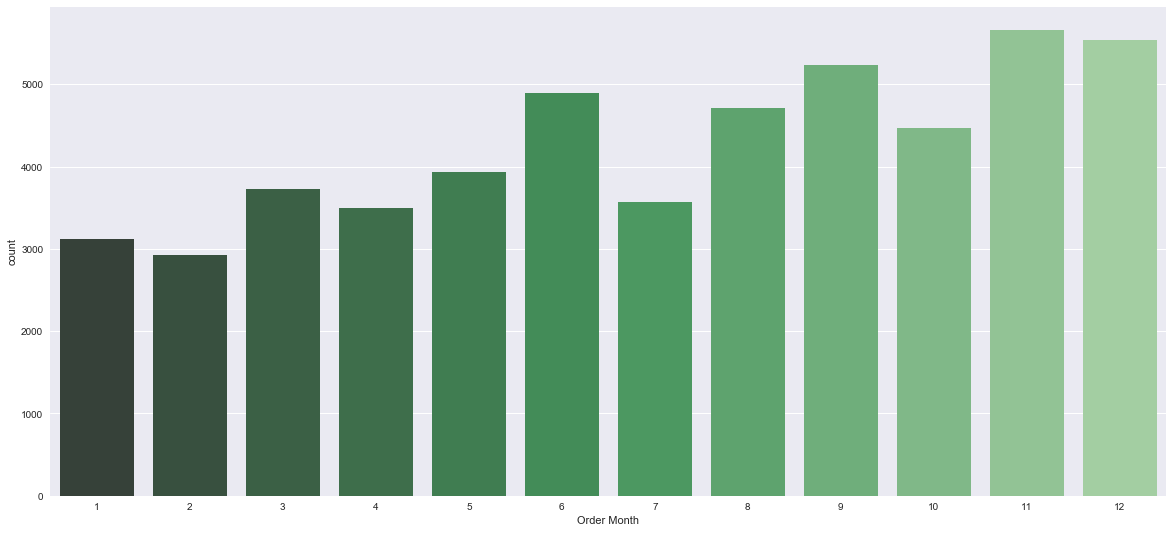

In [137]:
sns.countplot(x="Order Month", data=df, palette='Greens_d')